# Autori

Team **06** Data Mining & Machine Learning a.a 2023/24:
*   Murolo Aurelio
*   Antonio Marino
*   Chiara Chiaricchia



# Usefull Functions & Libraries

In [ ]:
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec
from matplotlib import gridspec

import numpy as np
import pandas as pd
from mpl_toolkits.mplot3d import Axes3D

import plotly.graph_objects as go
from mpl_toolkits.mplot3d import Axes3D

In [ ]:
def load_XOR_data(N=3000):
    rng = np.random.RandomState(1)                   # sets the seed for the numpy routine
    X = rng.randn(N, 2)                              # creates a 300x2 array of random numbers
    y = np.array(np.logical_xor(X[:, 0] > 0, X[:, 1] > 0), dtype=int) # see above
    y = np.expand_dims(y, 1) # Column Vector

    # Voglio ricreare la tabella della verità
    x1 = X[:, 0]
    x2 = X[:, 1]

    X1 = np.expand_dims(np.where(x1 > 0, 1, 0), axis=1)
    X2 = np.expand_dims(np.where(x2 > 0, 1, 0), axis=1)

    AB = np.hstack((X1,X2,y))
    columnsName = ['A','B','Y']
    TruthTable = pd.DataFrame(AB,columns = columnsName, index = None)


    y_hot_encoded = []

    for x in y:
        if x == 0:
            y_hot_encoded.append([1,0]) # Stiamo identificando il False dello XOR con questo label
        else:
            y_hot_encoded.append([0, 1]) # Stiamo identificando il True dello XOR con questo label
    return X, np.array(y_hot_encoded), TruthTable


In [ ]:
def Test_XOR_data(N):
    rng = np.random.RandomState(2)                   # diverso da 1
    X = rng.randn(N, 2)                              # creates a Nx2 array of random numbers
    y = np.array(np.logical_xor(X[:, 0] > 0, X[:, 1] > 0), dtype=int) # see above
    y = np.expand_dims(y, 1) # Column Vector

    # Voglio ricreare la tabella della verità
    x1 = X[:, 0]
    x2 = X[:, 1]

    X1 = np.expand_dims(np.where(x1 > 0, 1, 0), axis=1)
    X2 = np.expand_dims(np.where(x2 > 0, 1, 0), axis=1)

    AB = np.hstack((X1,X2,y))
    columnsName = ['A','B','Y']
    TruthTable = pd.DataFrame(AB,columns = columnsName, index = None)


    y_hot_encoded = []

    for x in y:
        if x == 0:
            y_hot_encoded.append([1,0]) # Stiamo identificando il False dello XOR con questo label
        else:
            y_hot_encoded.append([0, 1]) # Stiamo identificando il True dello XOR con questo label
    return X, np.array(y_hot_encoded)

In [ ]:
def plot_xor(N = 300):
    xx, yy = np.meshgrid(np.linspace(-3, 3, 50), np.linspace(-3, 3, 50))
    rng = np.random.RandomState(0)
    X = rng.randn(N, 2)
    y = np.array(np.logical_xor(X[:, 0] > 0, X[:, 1] > 0), dtype=int)

    gs = gridspec.GridSpec(2, 2)
    fig = plt.figure(figsize=(10, 8))

    ax = plt.subplot(gs[0, 0])
    plt.plot(X[y == 0, 0], X[y == 0, 1], 'ro', label='Y = 0')
    plt.plot(X[y == 1, 0], X[y == 1, 1], 'bo', label='Y = 1')

    plt.axhline(0, color='black', linestyle='--')  # Retta x1=0
    plt.axvline(0, color='black', linestyle='--')  # Retta x2=0

    plt.xlabel('X1')
    plt.ylabel('X2')
    plt.legend()
    plt.title('XOR')
    plt.show()

In [ ]:
def plotTruthTable():

  # Definizione della tabella della verità per XOR
  xor_truth_table = [
      [0, 0, 0],
      [0, 1, 1],
      [1, 0, 1],
      [1, 1, 0]
  ]

  # Creazione della tabella grafica
  fig, ax = plt.subplots(figsize=(5, 4))
  ax.axis('off')  # Disabilita gli assi

  # Definizione dei colori per i pallini
  colors = {0: 'red', 1: 'blue'}

  # Definizione delle posizioni per i pallini
  positions = [(1, 3), (2, 3), (3, 3)]

  # Aggiunta dei pallini alla tabella
  for i in range(4):
      for j in range(3):
          ax.plot(*positions[j], 'o', color=colors[xor_truth_table[i][j]], markersize=12)

      # Incrementa le posizioni per la prossima riga
      for k in range(len(positions)):
          positions[k] = (positions[k][0], positions[k][1] - 1)

  # Etichette per le colonne
  ax.text(1, 3.2, 'X1', ha='center', va='center', fontsize=10)
  ax.text(2, 3.2, 'X2', ha='center', va='center', fontsize=10)
  ax.text(3, 3.2, 'Y', ha='center', va='center', fontsize=10)

  # Mostra la tabella grafica
  fig.subplots_adjust(left=0.2, right=0.8, top=0.8, bottom=0.2)
  plt.show()


In [ ]:
def ActivationFunctionPlots():
  x = np.linspace(-5, 5, 100)
  functions = [(SoftMax, 'SoftMax'), (softmax_derivative, 'SoftMax Derivative'),
              (ReLU, 'ReLU'), (ReLU_derivative, 'ReLU Derivative'),
              (SigmoidFunc, 'Sigmoid'), (sigmoid_derivative, 'Sigmoid Derivative')]

  plt.figure(figsize=(15, 10))

  for i, (function, name) in enumerate(functions, 1):
      plt.subplot(3, 2, i)
      plt.plot(x, function(x)*1, color = 'black')
      plt.title(name)
      plt.grid(True)
      if name == 'Sigmoid':
        plt.scatter(0, function(0), color = 'red', label = r'$Sigmoid(Relu(x <= 0))$', alpha = 1, s  = 100, zorder = 3)
        plt.scatter(2 , function(2), color = 'blue', label = r'$Sigmoid(Relu(x > 0))$', alpha = 1, s = 100, zorder = 3)
        plt.fill_between(x, function(x), where=(x <= 0), color='black', alpha=0.8, label = r'Not in the domain of $Sig(ReLU(x))$')
        plt.legend()
      elif name == 'Sigmoid Derivative':
        # Colora le zone esterne al di fuori delle rette
        plt.fill_between(x, function(x), where=(x >= -3), color='green', alpha=0.8, label = r'$99,7$% of Data Points')
        plt.fill_between(x, function(x), where=(x <= 3), color='green', alpha=0.8)


        plt.fill_between(x, function(x), where=(x > 3), color='red', alpha=0.8, label = 'Evanescent Sigmoid gradient')
        plt.fill_between(x, function(x), where=(x < -3), color='red', alpha=0.8)

        plt.plot([3, 3], [0, function(3)], color='black', linestyle='--')
        plt.plot([-3, -3], [0, function(3)], color='black', linestyle='--')
        plt.legend()
      elif name == 'SoftMax': # Per fare lo stesso della sigmoide devo calcolare la cumulativa della sigmoide.
        plt.scatter(0, 0, color = 'red', label = r'$SoftMax(Relu(x <= 0))$', alpha = 1, s  = 100, zorder = 3)
        plt.scatter(2, 0.005, color = 'blue', label = r'$SoftMax(Relu(x > 0))$', alpha = 1, s = 100, zorder = 3)
        plt.legend()




  plt.tight_layout()
  plt.show()

In [ ]:
def PlottingDataSet(rawdata):
  X = rawdata
  # Grafico per ogni colonna
  fig, axs = plt.subplots(1, 2, figsize=(12, 5))

  # Grafico per la prima colonna
  axs[0].hist(X[:, 0], bins=30, color='blue', alpha=0.7)
  axs[0].set_title('Normal Guassian')
  axs[0].set_xlabel('X1')
  axs[0].set_ylabel('Frequenza')

  # Grafico per la seconda colonna
  axs[1].hist(X[:, 1], bins=30, color='red', alpha=0.7)
  axs[1].set_title('Normal Gaussian')
  axs[1].set_xlabel('X2')
  axs[1].set_ylabel('Frequenza')

  # Mostra i grafici per le colonne
  plt.show()

In [ ]:
def FloatToBinary(ColVect,eps):
  row1 = ColVect[0]
  row2 = ColVect[1]

  for row in range(len(ColVect)):
    if ColVect[row] - eps <= 0:
      ColVect[row] = 0
    if ColVect[row] + eps >= 1:
      ColVect[row] = 1
  return ColVect

In [ ]:
def EncodedToBinary(y_true):
  Y_true_notenc = []

  for row in range(len(y_true)):
    if np.array_equal(y_true[row], [0, 1]): # True Condition
        Y_true_notenc.append(1)
    else :                             # False Condition & No match
        Y_true_notenc.append(0)
  y_true = np.array(Y_true_notenc)
  return y_true

In [ ]:
def Loss_Epoch_Plot(LossList,N_epochs):
  lossArray = np.array(LossList)
  #assert len(lossArray) == N_epochs
  EpochArray = np.arange(0,N_epochs, 1,dtype=int)

  plt.plot(EpochArray, lossArray)
  plt.grid(True)
  plt.title('Loss vs Epochs')
  plt.xlabel('Epochs')
  plt.ylabel('Loss')

  plt.show()

# XOR DataSet Understanding

In [ ]:
rawdata, y_true, TruthTable = load_XOR_data()

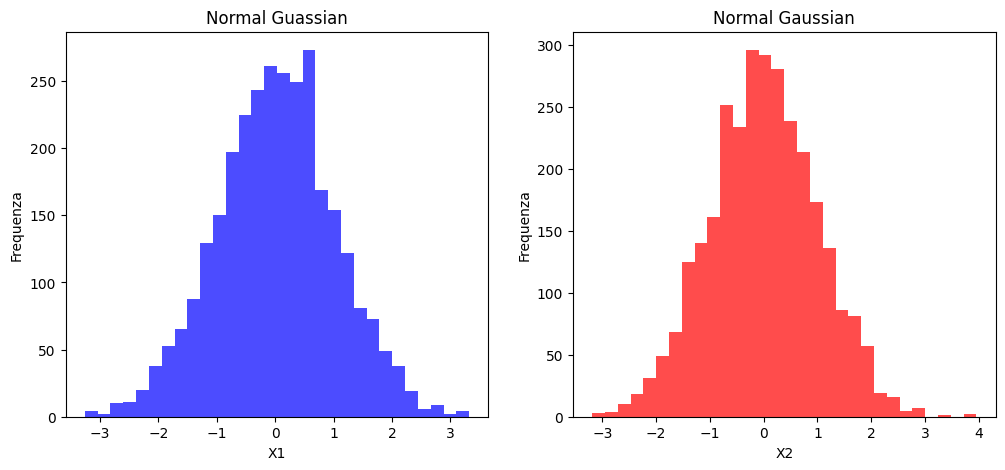

In [ ]:
PlottingDataSet(rawdata)

# Neural Network

## NN Ideas & Expected Results

The perceptron performs well in classifying raw data into two distinct categories by linearly separating the data using a straight line. Since in this case two lines are needed to separate the data (see Plot), we expect to have to insert at least one intermediate layer between the input and output layers.
In particular, it is necessary to build a neural network with two layers, one hidden and one output.
The analysis will be carried out with the following activation functions:


*   ReLU & Sigmoid
*   ReLU & Softmax
*   Sigmoid

The chosen order of analysis is not random; the first case is the one from which we expect the best results because the property of the sigmoid function to tend to zero for negative values and to one for positive values is exactly what we need to separate the True and False classes decoded with the vectors:


*   $[1,0]$ which identifies XOR False output $(0)$
*   $[0,1]$ which identifies XOR True output $(1)$

The choice to generate data with a normal distribution with mean zero and variance 1 input is not random. The possible values will fall within $[-3,3]$ with a probability of approximately **99.7%**. This ensures that the phenomenon of *vanishing gradient* does not occur. It is indeed outside this interval that the sigmoid function begins to flatten, causing the gradient to vanish and the consequent unusability of **Backpropagation** to apply **Gradient Descent**, necessary to minimize the *Loss function*.

We included the other two cases to verify how the network behaved when using SoftMax instead of Sigmoid and to show how the *Perceptron* was inefficient in this case for the reasons already explained.

For further details, in the next section, the activation functions used with their respective graphs are presented, followed by a comment on a possible "behavior" of the neural network based on their respective mathematical properties.


## Activation Function & Derivatives

In [ ]:
def SoftMax(InputArray):
  # Sottrae il massimo valore per evitare l'overflow
  shifted_input = InputArray - np.max(InputArray)
  return np.exp(shifted_input)/np.sum(np.exp(shifted_input))

def softmax_derivative(InputArray):
    return SoftMax(InputArray) * (1 - SoftMax(InputArray))

def ReLU(InputArray):
  return np.maximum(0,InputArray)

def ReLU_derivative(InputArray):
    return np.where(InputArray > 0, 1, 0)

def SigmoidFunc(InputArray, s=1): # s is the activation rate
  return 1/(1+np.exp(-(s*InputArray)))

def sigmoid_derivative(InputArray):
    return SigmoidFunc(InputArray) * (1 - SigmoidFunc(InputArray))

def binary_cross_entropy_(y_pred,y_true,epsilon = 1e-8 ): # array 2x1 input
   y_pred = np.clip(y_pred, epsilon, 1 - epsilon)  #  tra epsilon e 1 - epsilon
   return -np.mean(y_true * np.log(y_pred) + (1 - y_true) * np.log(1 - y_pred))

def binary_cross_entropy_derivative(y_pred, y_true, epsilon = 1e-8):
    y_pred = np.clip(y_pred, epsilon, 1 - epsilon)
    return -((y_true / (y_pred)) - ((1 - y_true) / (1 - y_pred)))

In [ ]:
def SoftMaxCumulative(start,alpha, stop, h = 0.01):
  cumulativeSoft = 0
  while start < alpha:
    cumulativeSoft += SoftMax(start)
    start += h

  return cumulativeSoft

In [ ]:
SoftMaxCumulative(-5,0,5,0.1)/1000.43

0.05097807942584689

## Activation Function Plots

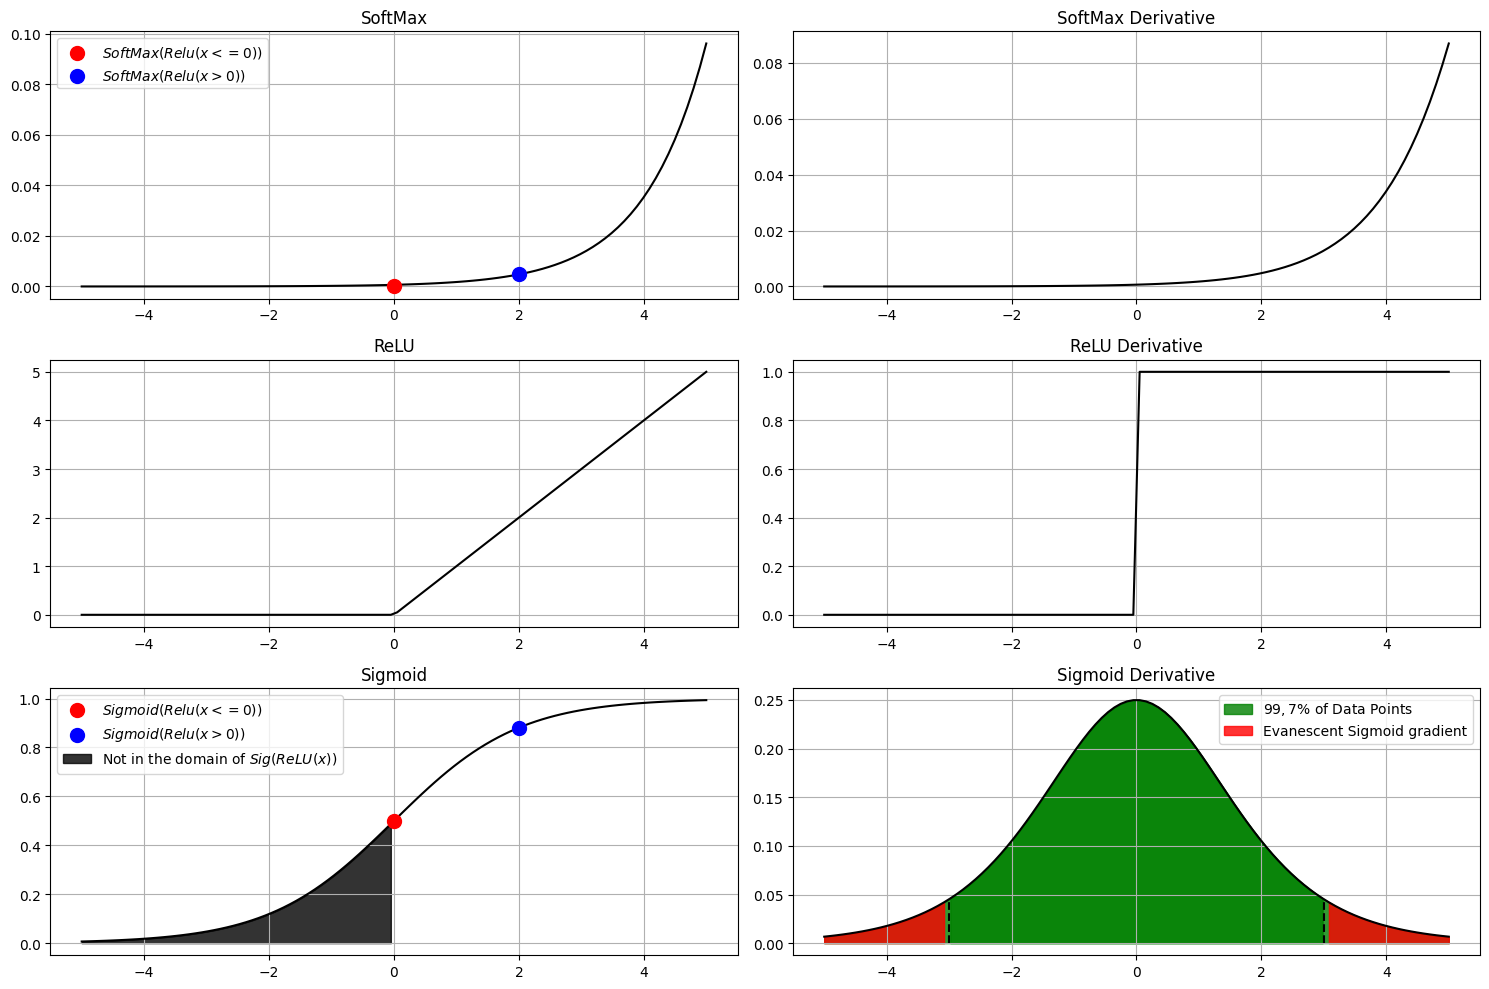

In [ ]:
ActivationFunctionPlots()

In the neural network where ReLU with $threshold = 0$ and Sigmoid are used, we expect that the input to the sigmoid will obviously be either $X = 0$ or $X = k > 0$. Consequently, only two classes of values can emerge from the sigmoid in the output (binary classification as expected):

1.  $Sigmoid(0) = 0.5$ , red point on the sigmoid plot;
2.  $Sigmoid(k) = C\in ]0.5,1[$ as the blue point on the graph.


Therefore, as shown in the table below, in accordance with the XOR plot, which we conveniently reproduce for reference, we have:



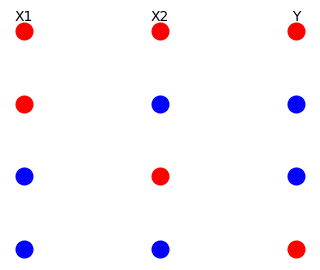

In [ ]:
plotTruthTable()

Where the color of the dots is consistent with that of the sigmoid plot and the following graph:

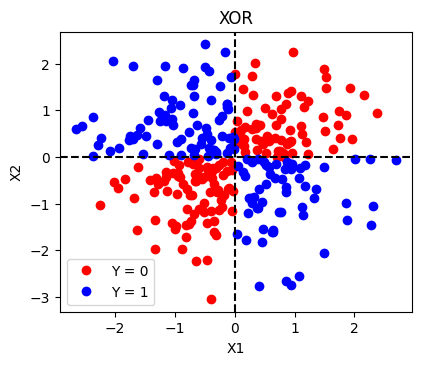

In [ ]:
plot_xor()

## ReLU & Sigmoid

### Building Arichitecture

In [ ]:
def DataVector(rawdata, row):
  data = np.array([rawdata[row,0], rawdata[row,1]])
  return np.expand_dims(data, 1)

def Row_y_true(y_true, row):
  y_row = y_true[row]
  return np.expand_dims(y_row, 1)

In [ ]:
assert len(y_true) == len(rawdata)

In [ ]:
def initparam(inputsize=2,hiddensize1=2,outputsize=2): # 2 Layer Architecture
  rng = np.random.RandomState(3)    # sets the seed for the numpy routine
  W1 = rng.randn(inputsize, hiddensize1)
  b1 = rng.randn(hiddensize1, 1)
  W2 = rng.randn(hiddensize1,outputsize)
  b2 = rng.randn(outputsize, 1)

  return W1, b1, W2, b2

In [ ]:
def forward_prop(W1,b1,W2,b2,DataVector):
  c1 = (W1.T).dot(DataVector) + b1 # 2x1
  h1 = ReLU(c1) # 2x1

  c2 = (W2.T).dot(h1) + b2 # 2x1
  h2 = SigmoidFunc(c2) # 2x1 poichè la classificazione è binaria
  return c1, h1, c2, h2

In [ ]:
assert np.shape(rawdata) == np.shape(y_true)

In [ ]:
def backward_prop(W1, b1, W2, b2, DataVector,rawdata, y_true, c1, h1, c2, h2, learning_rate):

    # Calcolo della loss
    loss = binary_cross_entropy_(h2, y_true)    # già calcola il valore medio

    #Back Prop Starting Point
    dL_dh2 =  (h2 -  y_true)                    # dL/dh2

    ## OUTPUT LAYER
    grad_c2 = dL_dh2 * sigmoid_derivative(h2)   # dL/dh2 * dh2/dc2 (Sigmoid_derivative)

    grad_W2 = np.dot(grad_c2, h1.T)             # dc2/dW2 * dL/dh2 * dh2/dc2
    grad_b2 = grad_c2.sum(axis=0)               # dc2/db2  * dL/dh2 * dh2/dc2
    grad_b2 = np.expand_dims(grad_b2, 1)

    grad_h1 = np.dot(W2, grad_c2)               # dc2/dh1 * dL/dh2 * dh2/dc2

    # HIDDEN LAYER

    # Calcolo del gradiente rispetto a c1
    grad_c1 = grad_h1 * ReLU_derivative(c1)     # dL/dh1 * dh1/dc1 (ReLu_derivative)
    # Calcolo del gradiente rispetto a W1 e b1
    grad_W1 = np.dot(grad_c1, DataVector.T)
    grad_b1 = grad_c1.sum(axis=0)
    grad_b1 = np.expand_dims(grad_b1, 1)


    # Aggiornamento dei pesi e dei bias (GradientDescendent)
    W1 -= learning_rate * grad_W1.T
    b1 -= learning_rate * grad_b1
    W2 -= learning_rate * grad_W2.T
    b2 -= learning_rate * grad_b2


    return W1, b1, W2, b2, loss

### Training & Testing

In [ ]:
rawdata, y_true, TruthTable = load_XOR_data(3000)

In [ ]:
epochsReSig = 2000 #2000
N = len(rawdata)
learning_rate = 0.01
def Training_NN(N,learning_rate,rawdata,y_true):
  W1, b1, W2, b2 = initparam(2,5,2)
  Loss_All_Epoch = []
  for epoch in range(epochsReSig):     # Quante volte alleno il mio modello sui dati
    loss_report = []
    for row in range(N):            # Estrazione della singola coppia di dati
      Data_Vector = DataVector(rawdata, row)
      y_true21 = Row_y_true(y_true, row)

      c1, h1, c2, h2 = forward_prop(W1,b1,W2,b2,Data_Vector)
      W1, b1, W2, b2, loss = backward_prop(W1, b1, W2, b2, Data_Vector, rawdata, y_true21, c1, h1, c2, h2, learning_rate)
      loss_report.append(loss)

    Loss_epoch = sum(loss_report) / N
    Loss_All_Epoch.append(Loss_epoch)
    if epoch % 250 == 0:
      print(f'Epoch {epoch}, Loss: {Loss_epoch}')

  return W1, b1, W2, b2, Loss_All_Epoch , h2   # Best Set of Parameters

In [ ]:
W1_ReSig, b1_ReSig, W2_ReSig, b2_ReSig, loss_ReSig, h2_ReSig = \
Training_NN(N, learning_rate, rawdata, y_true)

Epoch 0, Loss: 0.7701326776187334
Epoch 250, Loss: 0.05926594103108506
Epoch 500, Loss: 0.04359020536830382
Epoch 750, Loss: 0.03711304216601258
Epoch 1000, Loss: 0.032752198173676285
Epoch 1250, Loss: 0.028923201208856174
Epoch 1500, Loss: 0.025227778563159393
Epoch 1750, Loss: 0.02224517622831227


To perform testing, it might be more convenient to simulate additional data from a normal distribution by setting a different seed from the one used for the training phase. This way, the *noise* should be different, and therefore not 'known' to our neural network.

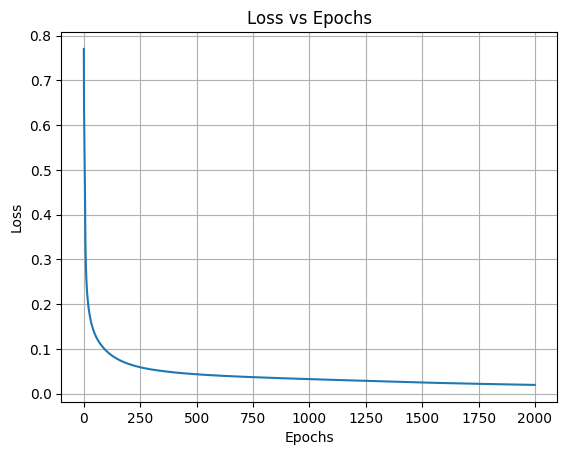

In [ ]:
Loss_Epoch_Plot(loss_ReSig, epochsReSig)

In [ ]:
N_test = int(N * 0.20)
X_test, Y_trueTest = Test_XOR_data(N_test)  # 20% dei dati del train

In [ ]:
def Testing_NN(rawdata, N, W1, b1, W2, b2, y_true,eps):
    count = 0

    for row in range(N):
        Data_Vector = DataVector(rawdata, row)
        y_true21 = Row_y_true(y_true, row)

        c1, h1, c2, h2 = forward_prop(W1, b1, W2, b2, Data_Vector)

        # Considera predizioni corrette quando i valori predetti sono sopra la soglia eps
        correct_predictions = np.abs(h2 - y_true21) <= eps
        count += np.all(correct_predictions)  # Aggiorna il conteggio totale delle predizioni corrette

    total = N                                 # Utilizza il numero totale di esempi nel set di dati
    accuracy = (count / total) * 100          # Calcola l'accuratezza

    return accuracy


In [ ]:
eps = 1e-4 # Errore che vogliamo assumere sul nostro modello
accuracyBias = Testing_NN(rawdata, N, W1_ReSig, b1_ReSig, W2_ReSig, b2_ReSig, y_true, eps) # Qui stiamo inserendo il set di parametri ottenuto dal training!
print('Accuracy(Bias):',np.round(accuracyBias,2),'%')

eps = 1e-4 # Errore che vogliamo assumere sul nostro modello
accuracyVariance = Testing_NN(X_test, N_test, W1_ReSig, b1_ReSig, W2_ReSig, b2_ReSig, Y_trueTest, eps) # Qui stiamo inserendo il set di parametri ottenuto dal training!
print('Accuracy(Variance):',np.round(accuracyVariance,2),'%')

Accuracy(Bias): 90.1 %
Accuracy(Variance): 91.0 %


We have chosen to perform testing while keeping the values in float format without rounding them to integers for consistency with the input data. However, to further analyze, we perform the conversion below and see if they match exactly with the hot-encoded data.

To avoid obtaining a trivial result, we round the values to 0 and 1, respectively, for those that are close within a certain epsilon. The value to associate with epsilon depends on how close we want our prediction to be considered correct to the expected value; obviously, the smaller epsilon is, the more stringent the constraint is.

In our case, for example, we managed to achieve a model accuracy of 90.1% with an error on the order of 1/10,000.

In [ ]:
def Testing_NN_integer(rawdata, N, W1, b1, W2, b2, y_true,eps):
    count = 0

    for row in range(N):
        Data_Vector = DataVector(rawdata, row)
        y_true21 = Row_y_true(y_true, row)

        c1, h1, c2, h2 = forward_prop(W1, b1, W2, b2, Data_Vector)

        h2_int = FloatToBinary(h2,eps)
        # Considera predizioni corrette quando i valori predetti sono uguali
        correct_predictions = np.abs(h2_int - y_true21) == 0
        count += np.all(correct_predictions)  # Aggiorna il conteggio totale delle predizioni corrette

    total = N                                 # Utilizza il numero totale di esempi nel set di dati
    accuracy = (count / total) * 100          # Calcola l'accuratezza

    return accuracy

In [ ]:
accuracy_int = Testing_NN_integer(rawdata, N, W1_ReSig, b1_ReSig, W2_ReSig, b2_ReSig, y_true, eps) # Qui stiamo inserendo il set di parametri ottenuto dal training!
print('Accuracy:',np.round(accuracy_int,2),'%')

Accuracy: 90.1 %


In [ ]:
assert accuracyBias == accuracy_int # Ovviamente è ciò che ci aspettiamo

In [ ]:
#Dimostro come funziona la funzione
a = np.array([0.15, 0.9]).T
b = np.array([0.88, 0.1]).T
FloatToBinary(a,0.1), FloatToBinary(b,0.1)

(array([0.15, 1.  ]), array([0.88, 0.  ]))

## ReLU & SoftMax

### Architecture & Functions

In [ ]:
def forward_prop_Soft_Max(W1,b1,W2,b2,DataVector):
  c1 = (W1.T).dot(DataVector) + b1 # 2x1
  h1 = ReLU(c1) # 2x1

  c2 = (W2.T).dot(h1) + b2 #2x1
  h2 = SoftMax(c2) # 2x1 output
  return c1, h1, c2, h2 # predicted value

In [ ]:
def backward_prop_Soft_Max(W1, b1, W2, b2, DataVector,rawdata, y_true, c1, h1, c2, h2, learning_rate):

    # Calcolo della loss per una singola row di predicted ed expected
    loss = binary_cross_entropy_(h2, y_true)

    #Back Prop Starting Point
    dL_dh2 =  (h2 -  y_true)                     # dL/dh2

    ## OUTPUT LAYER
    grad_c2 = dL_dh2 * ReLU_derivative(h2)   # dL/dh2 * dh2/dc2 (ReLU_derivative)

    grad_W2 = np.dot(grad_c2, h1.T)             # dc2/dW2 * dL/dh2 * dh2/dc2
    grad_b2 = grad_c2.sum(axis=0)               # dc2/db2  * dL/dh2 * dh2/dc2
    grad_b2 = np.expand_dims(grad_b2, 1)

    grad_h1 = np.dot(W2, grad_c2)             # dc2/dh1 * dL/dh2 * dh2/dc2

    # HIDDEN LAYER

    # Calcolo del gradiente rispetto a c1
    grad_c1 = grad_h1 * ReLU_derivative(c1)     # dL/dh1 * dh1/dc1 (ReLu_derivative)
    # Calcolo del gradiente rispetto a W1 e b1
    grad_W1 = np.dot(grad_c1, DataVector.T)
    grad_b1 = grad_c1.sum(axis=0)
    grad_b1 = np.expand_dims(grad_b1, 1)


    # Aggiornamento dei pesi e dei bias (GradientDescendent)
    W1 -= learning_rate * grad_W1.T
    b1 -= learning_rate * grad_b1
    W2 -= learning_rate * grad_W2.T
    b2 -= learning_rate * grad_b2


    return W1, b1, W2, b2, loss

### Training & Testing

In [ ]:
rawdata, y_true, TruthTable = load_XOR_data(3000)

In [ ]:
epochsReSoft = 500
N = len(rawdata)
learning_rate = 0.01
def Training_NN_Soft_Max(N,learning_rate,rawdata,y_true):
  W1, b1, W2, b2 = initparam(2,5,2)
  Loss_All_Epoch = []
  for epoch in range(epochsReSoft):     # Quante volte alleno il mio modello sui dati
    loss_report = []
    for row in range(N):          # estrazione della singola coppia di dati
      Data_Vector = DataVector(rawdata, row)
      y_true21 = Row_y_true(y_true, row)

      c1, h1, c2, h2 = forward_prop_Soft_Max(W1,b1,W2,b2,Data_Vector)
      W1, b1, W2, b2, loss = backward_prop_Soft_Max(W1, b1, W2, b2, Data_Vector, rawdata, y_true21, c1, h1, c2, h2, learning_rate)
      loss_report.append(loss)

    Loss_epoch = sum(loss_report) / N
    Loss_All_Epoch.append(Loss_epoch)
    if epoch % 100 == 0:
        print(f'Epoch {epoch}, Loss: {Loss_epoch}')

  return W1, b1, W2, b2, Loss_All_Epoch   # Best Set of Parameteres

In [ ]:
W1_ReSoft, b1_ReSoft, W2_ReSoft, b2_ReSoft, loss_ReSoft = Training_NN_Soft_Max(N, learning_rate, rawdata, y_true)

Epoch 0, Loss: 0.691063211381607
Epoch 100, Loss: 0.09102895231243116
Epoch 200, Loss: 0.0913518362098992
Epoch 300, Loss: 0.09824364622722277
Epoch 400, Loss: 0.07494194700426586


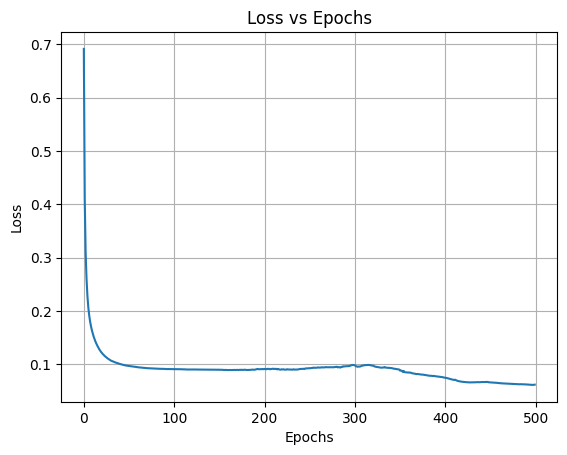

In [ ]:
Loss_Epoch_Plot(loss_ReSoft, epochsReSoft)

In [ ]:
def Testing_NN_Soft_Max(rawdata, N, W1, b1, W2, b2, y_true,eps):
    count = 0

    for row in range(N):
        Data_Vector = DataVector(rawdata, row)
        y_true21 = Row_y_true(y_true, row)

        c1, h1, c2, h2 = forward_prop_Soft_Max(W1, b1, W2, b2, Data_Vector)

        # Considera predizioni corrette quando i valori predetti sono sopra la soglia 0.5
        correct_predictions = np.abs(h2 - y_true21) < eps
        count += np.all(correct_predictions)  # Aggiorna il conteggio totale delle predizioni corrette

    total = N                                 # Utilizza il numero totale di esempi nel set di dati
    accuracy = (count / total) * 100          # Calcola l'accuratezza

    return accuracy


In [ ]:
eps = 1e-4
accuracyBias = Testing_NN_Soft_Max(rawdata, N, W1_ReSoft, b1_ReSoft, W2_ReSoft, b2_ReSoft, y_true, eps) # Qui stiamo inserendo il set di parametri ottenuto dal training!
print('Accuracy(Bias):',np.round(accuracyBias,2),'%')

eps = 1e-4
accuracyVar = Testing_NN_Soft_Max(X_test, N_test, W1_ReSoft, b1_ReSoft, W2_ReSoft, b2_ReSoft, Y_trueTest, eps) # Qui stiamo inserendo il set di parametri ottenuto dal training!
print('Accuracy(Var):',np.round(accuracyVar,2),'%')

Accuracy(Bias): 91.53 %
Accuracy(Var): 92.83 %


In [ ]:
def Testing_NN_integer_SoftMax(rawdata, N, W1, b1, W2, b2, y_true,eps):
    count = 0

    for row in range(N):
        Data_Vector = DataVector(rawdata, row)
        y_true21 = Row_y_true(y_true, row)

        c1, h1, c2, h2 = forward_prop_Soft_Max(W1, b1, W2, b2, Data_Vector)

        h2_int = FloatToBinary(h2,eps)
        # Considera predizioni corrette quando i valori predetti sono uguali
        correct_predictions = np.abs(h2_int - y_true21) == 0
        count += np.all(correct_predictions)  # Aggiorna il conteggio totale delle predizioni corrette

    total = N                                 # Utilizza il numero totale di esempi nel set di dati
    accuracy = (count / total) * 100          # Calcola l'accuratezza

    return accuracy

In [ ]:
accuracy_int = Testing_NN_integer(rawdata, N,W1_ReSoft, b1_ReSoft, W2_ReSoft, b2_ReSoft, y_true, eps) # Qui stiamo inserendo il set di parametri ottenuto dal training!
print('Accuracy:',np.round(accuracy_int,2),'%')

Accuracy: 73.93 %


## Sigmoid

In [ ]:
def initparam_():
  rng = np.random.RandomState(1)    # sets the seed for the numpy routine

  W2 = rng.randn(2, 2)
  b2 = rng.randn(2, 1)

  return  W2, b2

In [ ]:
def forward_prop_noReLU(W2, b2, DataVector):

  c2 = W2.dot(DataVector) + b2  # 2x1
  h2 = SigmoidFunc(c2,1.5)          # 2x1 output

  return c2, h2                 # output value

In [ ]:
def backward_prop_noReLU(W2, b2, DataVector,rawdata, y_true, c2, h2, learning_rate):

    # Calcolo della loss
    loss = binary_cross_entropy_(h2, y_true)

    #Back Prop Starting Point
    dL_dh2 =  (h2 -  y_true)                    # dL/dh2

    ## OUTPUT LAYER
    grad_c2 = dL_dh2 * sigmoid_derivative(h2)   # dL/dh2 * dh2/dc2 (Sigmoid_derivative)

    grad_W2 = np.dot(DataVector.T, grad_c2)             # dc2/dW2 * dL/dh2 * dh2/dc2
    grad_b2 = grad_c2.sum(axis=0)               # dc2/db2  * dL/dh2 * dh2/dc2
    grad_b2 = np.expand_dims(grad_b2, 1)


    # Aggiornamento dei pesi e dei bias (GradientDescendent)
    W2 -= learning_rate * grad_W2
    b2 -= learning_rate * grad_b2


    return W2, b2, loss

### Training & Test

In [ ]:
rawdata, y_true, TruthTable = load_XOR_data(3000)

In [ ]:
epochs = 50
N = len(rawdata)
learning_rate_prec = 0.1
def Training_NN_noReLU(N,learning_rate,rawdata,y_true):
  W2, b2 = initparam_()
  Loss_All_epochs = []
  for epoch in range(epochs):     # Quante volte alleno il mio modello sui dati
    loss_report = []
    for row in range(N):          # estrazione della singola coppia di dati
      Data_Vector = DataVector(rawdata, row)
      y_true21 = Row_y_true(y_true, row)

      c2, h2 = forward_prop_noReLU(W2,b2,Data_Vector)
      W2, b2, loss = backward_prop_noReLU( W2, b2, Data_Vector, rawdata, y_true21, c2, h2, learning_rate)
      loss_report.append(loss)

    Loss_epoch = sum(loss_report) / N
    Loss_All_epochs.append(Loss_epoch)
    if epoch % 10 == 0:
        print(f'Epoch {epoch}, Loss: {Loss_epoch}')

  return W2, b2, Loss_All_epochs     # Best Set of Parameteres + list of Loss for each epoch

In [ ]:
W2_Sig, b2_Sig, loss_Sig = Training_NN_noReLU(N, learning_rate_prec, rawdata, y_true)

Epoch 0, Loss: 1.5569323669724524
Epoch 10, Loss: 1.5514181802439233
Epoch 20, Loss: 1.5514181802439182
Epoch 30, Loss: 1.5514181802439198
Epoch 40, Loss: 1.5514181802439224


In [ ]:
def Testing_NN_noReLU(rawdata, N, W2, b2, y_true, eps):
    count = 0

    for row in range(N):
        Data_Vector = DataVector(rawdata, row)
        y_true21 = Row_y_true(y_true, row)

        c2, h2 = forward_prop_noReLU(W2, b2, Data_Vector)

        # Considera predizioni corrette quando i valori predetti sono sopra la soglia 0.5
        correct_predictions = np.abs(h2 - y_true21) < eps
        count += np.all(correct_predictions)  # Aggiorna il conteggio totale delle predizioni corrette

    total = N                                 # Utilizza il numero totale di esempi nel set di dati
    accuracy = (count / total) * 100          # Calcola l'accuratezza

    return accuracy


In [ ]:
eps2 = 0.01
accuracy = Testing_NN_noReLU(rawdata, N,W2_Sig, b2_Sig, y_true, eps2) # Qui stiamo inserendo il set di parametri ottenuto dal training!
print('Accuracy:',np.round(accuracy,2),'%')

Accuracy: 2.2 %


As we expected this model is not the best one for this problem.

# Contouring

In this section, we will visualize the boundaries predicted by the model parameters that minimize the *Loss function* on the data generated with the initial Gaussian distribution. In particular:


1. We have generated a **grid of points** with a uniform distribution over a slightly wider range than that used for the ***rawdata*** $[-3.5;3.5]$ to avoid missing any points on the tails of the Gaussians.
2. With the **Best Set** of parameters obtained by training the model on Gaussian data, we performed **inference** on the points that made up the grid, considering the same parameter *eps* to evaluate the order of magnitude of the accuracy with which *h2* correctly predicted *y_true*.
3. The points that predicted **$[0,1]$** were converted to **$1$**, the points that predicted **$[1,0]$** were converted to **$0$**, and the remaining points were converted to a chosen value $k = 0.5$. The *inference* function takes each point of the grid as input and assigns to each one a value that theoretically (with $100$ **%**  accuracy) should be either $0$ or $1$, but in reality behaves as follows.

$ f(xx,yy) = \begin{cases}
    1 & \text{if predicted } [0,1] \\
    0 & \text{if predicted } [1,0] \\
    k & \text{otherwise}
\end{cases} $


So the Neural Network is a mapping
$ f : \mathbb{R}^2 \rightarrow \mathbb{R}^1$.
4. Finally, we visualized the **3-D Binary Step Function** and the contour plots of the various layers of the function, which should be either $f(xx,yy) = 0$ or $f(xx,yy) = 1$, except for the values not predicted by the model, which will have $f(xx,yy) = k\in]0,1[$ as we already said.

In [ ]:
rawdata, y_true, TruthTable = load_XOR_data(3000)

In [ ]:
W1, W2, b1, b2 = W1_ReSig, W2_ReSig, b1_ReSig, b2_ReSig
# Inizializza il Best Set Parameters del modello di cui vedere i boundaries
# ReSig = ReLU + Sigmoide
# ReSoft = ReLU + SoftMax
# Per il Preceptron con la Sigmoide i parametri sono solo due !

Obviously, an inference function should be defined for each neural network. Each one, based on its Best Set, behaves like a function $ f : \mathbb{R}^2 \rightarrow \mathbb{R}^1$ but it could perform a different mapping in according to its performances.

In [ ]:
y_trueBinary = EncodedToBinary(y_true) # Funzione definita all'inizio

The step above is needed for the color map.

## Usefull Functions & Libraries

In [ ]:
def inference_ReLU_Sig(data, W1, W2, b1, b2): # Best Set after training the desired NN
  #global W1, W2, b1, b2
  eps = 1e-4
  flat_grid = []           # Per collezionare i valori dei punti
  N = len(data)
  countTrue = 0
  countF =  0
  countmiss = 0
  for row in range(N):
    Data_Vector = DataVector(data, row)
    c1, h1, c2, h2_uniform_pred = forward_prop(W1,b1,W2,b2, Data_Vector)

    h2_uniform_pred = FloatToBinary(h2_uniform_pred,eps)
    Truecondition = np.abs(h2_uniform_pred.T - [0, 1])
    Falsecondition = np.abs(h2_uniform_pred.T - [1, 0])

    if np.all(Truecondition) == 0: # True Condition
      countTrue += 1
      flat_grid.append(1)
    elif np.all(Falsecondition) == 0 : # False Condition
      flat_grid.append(0)
      countF += 1
    else: # No match creiamo un altro livello intermedio
      countmiss += 1
      flat_grid.append(0.5)

  inferenceAccuracy = ((countTrue + countF) / N) * 100
  zz = np.array(flat_grid)
  assert N == countTrue + countF + countmiss
  return zz , np.round(inferenceAccuracy,2)

In [ ]:
def plot_decision_boundary(X,inference, y_trueBinary, W1, W2, b1, b2, save_filepath=None, text=None):
    # Set min and max values and give it some padding
    x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5 #genero a caso
    y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
    points_number = 52 # Quanto densa voglio la mia griglia

    x1x1 = np.linspace(x_min, x_max , points_number)
    y1y1 = np.linspace(y_min, y_max, points_number)

    # Generate a grid of points with distance a chosen number point(52x52)
    xx, yy = np.meshgrid(x1x1, y1y1)
    # Predict the function value for the whole gid
    grid_data = np.c_[xx.ravel(), yy.ravel()]

    zz, inferenceAccuracy = inference(grid_data, W1, W2, b1, b2)

    zz = zz.reshape(xx.shape)

    # Plot the contour and training examples
    plt.figure()

    plt.contourf(xx, yy, zz, cmap=plt.cm.Paired)
    plt.scatter(X[:, 0], X[:, 1], c=y_trueBinary, cmap=plt.cm.Spectral, s = 10)

    #plt.colorbar()
    plt.title('Inferenced Bounds')
    plt.xlabel('X1')
    plt.ylabel('X2')

    if text:
        #plt.xlim(2, 2)
        #plt.ylim(0, 4)
        plt.text(-3.2, 3.3, text, fontsize=14)
    if save_filepath == None:
        plt.show()
    else:
        plt.savefig(save_filepath)
    plt.close()

    print('InferenceAccuracy(%):', inferenceAccuracy)
    return zz, xx, yy

In [ ]:
def plot_decision_boundaryLine(X,inference, y_trueBinary, W1, W2, b1, b2, save_filepath=None, text=None):
    # Set min and max values and give it some padding
    x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5 #genero a caso
    y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
    points_number = 52 # Quanto densa voglio la mia griglia

    x1x1 = np.linspace(x_min, x_max , points_number)
    y1y1 = np.linspace(y_min, y_max, points_number)

    # Generate a grid of points with distance a chosen number point(52x52)
    xx, yy = np.meshgrid(x1x1, y1y1)
    # Predict the function value for the whole gid
    grid_data = np.c_[xx.ravel(), yy.ravel()]

    zz, inferenceAccuracy = inference(grid_data, W1, W2, b1, b2)

    zz = zz.reshape(xx.shape)

    # Plot the contour and training examples
    plt.figure()


    predBound = plt.contour(xx, yy, zz, levels = [0,0.5] ,colors=['black','black'], linestyles='-')
    plt.clabel(predBound, inline=True, fontsize=11)

    plt.scatter(X[:, 0], X[:, 1], c=y_trueBinary, cmap=plt.cm.Spectral, s = 10)

    plt.colorbar()
    plt.title('Inferenced Bounds')
    plt.xlabel('X1')
    plt.ylabel('X2')

    if text:
        #plt.xlim(2, 2)
        #plt.ylim(0, 4)
        plt.text(-3.2, 3.3, text, fontsize=14)
    if save_filepath == None:
        plt.show()
    else:
        plt.savefig(save_filepath)
    plt.close()

    print('InferenceAccuracy(%):', inferenceAccuracy)
    return zz, xx, yy

In [ ]:
def plot_3D1():

  # Crea una figura e un'area di disegno 3D
  fig = plt.figure()
  ax = fig.add_subplot(111, projection='3d')

  # Plot della superficie 3D
  surf = ax.plot_surface(xx, yy, zz, cmap='viridis')

  # Aggiungi una barra dei colori
  fig.colorbar(surf)

  # Etichette degli assi
  ax.set_xlabel('XX')
  ax.set_ylabel('YY')
  ax.set_zlabel('ZZ')

  plt.title('3-D Binary_Step_Function')
  plt.show()

In [ ]:
def  plot_3D2():
  # Crea il grafico 3D della superficie
  fig = go.Figure(data=[go.Surface(z=zz, x=xx, y=yy)])

  # Aggiungi etichette degli assi
  fig.update_layout(scene=dict(
                      xaxis_title='XX',
                      yaxis_title='YY',
                      zaxis_title='ZZ'),
                      title='3-D Binary_step_function')

  # Mostra il grafico interattivo
  fig.show()

In [ ]:
def plot_3DScatter():

  fig = go.Figure()

  # Aggiungi la superficie
  fig.add_trace(go.Surface(z=zz, x=xx, y=yy))

  # Crea  liste per i colori dei marker basati sui valori di z
  colors = ['blue' if val == 1 else 'red' if val == 0 else 'black' for val in zz.ravel()]

  # Aggiungi lo scatter plot
  fig.add_trace(go.Scatter3d(x=xx.ravel(), y=yy.ravel(), z=zz.ravel(), mode='markers',
                              marker=dict(size=5, color=colors), name='Scatter Plot'))

  # Aggiungi etichette degli assi
  fig.update_layout(scene=dict(
                      xaxis_title='XX',
                      yaxis_title='YY',
                      zaxis_title='ZZ'),
                      title='3-D Binary_step_function')

  # Mostra il grafico interattivo
  fig.show()

## Decision Boundaries & Plots

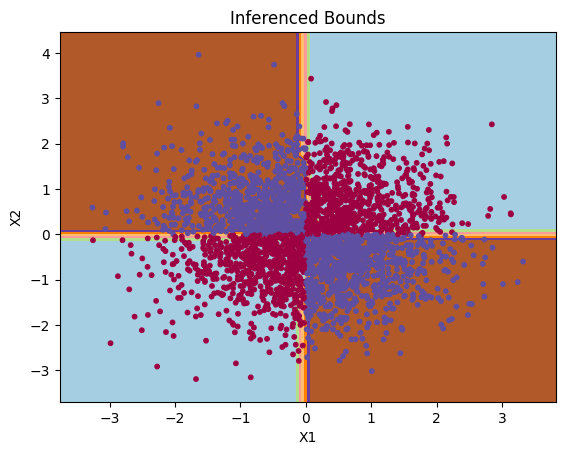

InferenceAccuracy(%): 96.63


In [ ]:
zz, xx, yy = plot_decision_boundary(rawdata, inference_ReLU_Sig,y_trueBinary, W1, W2, b1, b2,
                                    save_filepath=None, text=None)

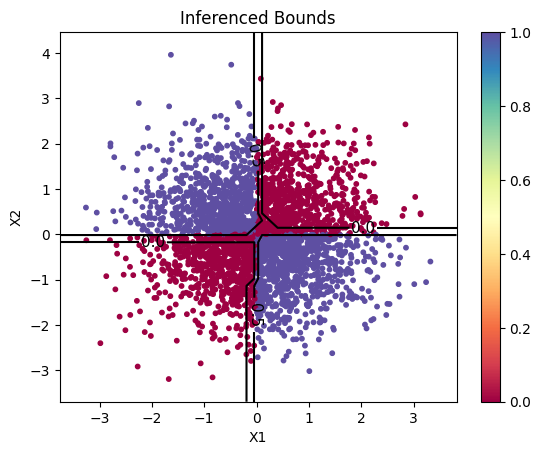

InferenceAccuracy(%): 96.63


In [ ]:
zz, xx, yy = plot_decision_boundaryLine(rawdata, inference_ReLU_Sig,y_trueBinary, W1, W2, b1, b2,
                                    save_filepath=None, text=None)

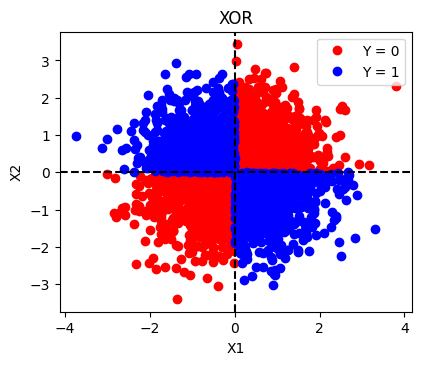

In [ ]:
plot_xor(3000) # Expected value

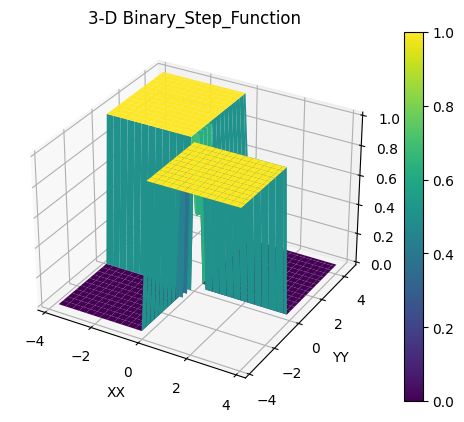

In [ ]:
plot_3D1()

In [ ]:
plot_3D2()

In [ ]:
plot_3DScatter()

As expected from the plots, a smoothed version of the 3D Binary Step Function emerged, linked to the precision of 'only' 96.63%.